In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submit = pd.read_csv("gender_submission.csv")
combine = [train_data, test_data]

## Discovering the data

In [3]:
# features type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_data.head()
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Chenck the Feature
train_data.columns.values
test_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
# Missing Values
train_data.isnull().sum()
test_data.isnull().sum()
# train: Age 19.8% are missed; Cabin 77.1% are missed, Embarked 2 missed values
# test: Age 20.5% are missed; Cabin 78.2% are missed, Fare 1 missed values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Describe()
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Discovering the categorical data distribution
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Survived', ylabel='count'>

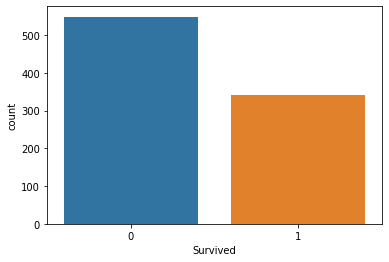

In [10]:
# Count The Survived
sns.countplot(train_data['Survived'])

<AxesSubplot:ylabel='Survived'>

Text(0, 0.5, '')

<AxesSubplot:xlabel='Survived', ylabel='count'>

Text(0, 0.5, '')

Text(0.5, 0, '')

<function matplotlib.pyplot.show(close=None, block=None)>

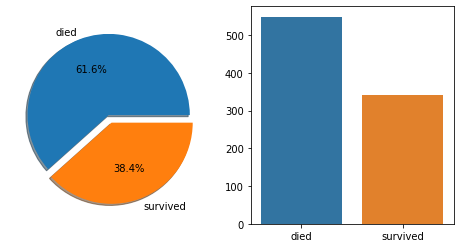

In [11]:
# Count The Survived
f, ax = plt.subplots(1, 2, figsize=(8, 4))
train_data['Survived'].replace({0:'died', 1:'survived'}).value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow = True)
ax[0].set_ylabel('')
sns.countplot(x = train_data["Survived"].replace({0:'died', 1:'survived'}), ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show
# 38% of the passengers survived

In [12]:
# bar plot functions
def survived_bar_plot(feature):
    plt.figure(figsize = (6, 4))
    sns.barplot(data = train_data, x = feature, y = 'Survived').set_title(f'{feature} Vs Survived')
    plt.show()

def survived_table(feature):
    return train_data[[feature, 'Survived']].groupby([feature]
             , as_index=False).mean().sort_values(by = 'Survived', ascending = False).style.background_gradient(low=0.75, high=1)

def survived_hist_plot(feature):
    plt.figure(figsize = (6, 4))
    sns.histplot(data = train_data, x = feature, hue = 'Survived', binwidth=5, palette = sns.color_palette(['yellow', 'green']), multiple = 'stack').set_title(f"{feature} Vs Survived")
    plt.show()

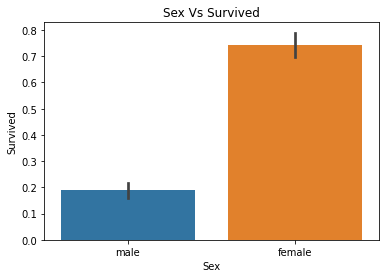

In [13]:
# Sex Vs survived
survived_bar_plot('Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

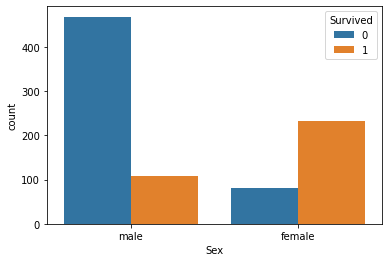

In [14]:
#The relationship between sex class and survival rate
sns.countplot(train_data["Sex"], hue=train_data["Survived"])

In [15]:
survived_table('Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


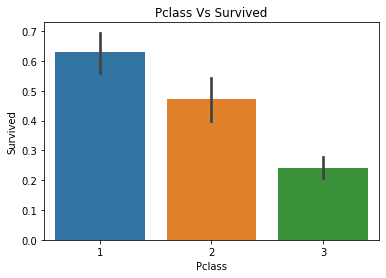

In [16]:
# Pclass Vs Survived
survived_bar_plot('Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

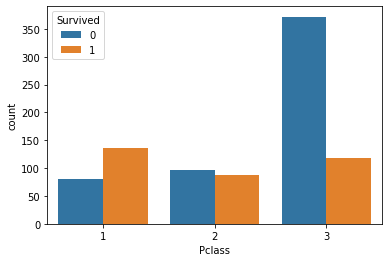

In [17]:
#The relationship between cabin class and survival rate
sns.countplot(train_data['Pclass'], hue = train_data["Survived"])

In [18]:
survived_table('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


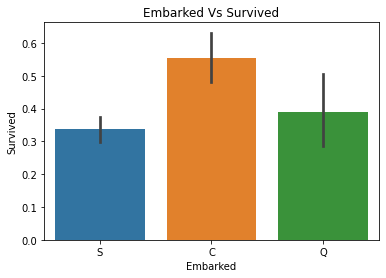

In [19]:
# Embarked Vs Survived
survived_bar_plot('Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

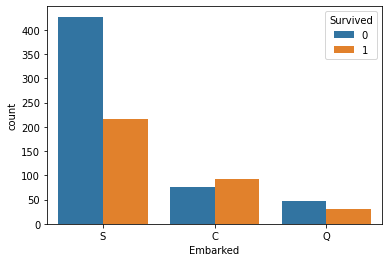

In [20]:
#S city have highest dead rate
sns.countplot(train_data['Embarked'], hue = train_data["Survived"])

In [21]:
survived_table("Embarked")

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


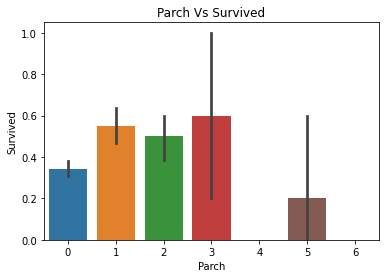

In [22]:
# Parch Vs Survived
survived_bar_plot('Parch')

<AxesSubplot:xlabel='Parch', ylabel='count'>

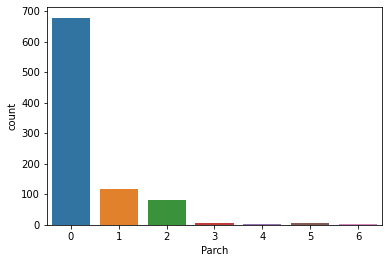

In [23]:
# >70% passengers travel without parents/children.
sns.countplot(train_data['Parch'])

In [24]:
survived_table('Parch')
# This feature has zero correlation for some values

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


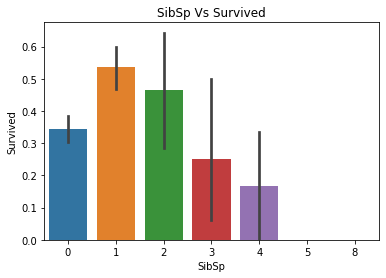

In [25]:
# SibSp Vs Survived
survived_bar_plot('SibSp')

In [26]:
survived_table('SibSp')
# This feature has zero correlation for some values too.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


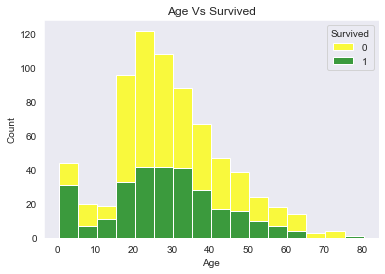

In [27]:
# Age Vs Survived
sns.set_style('dark') # to remove the grid.
survived_hist_plot('Age') # stack plot
# elder passenger (>75 years old) and childrens(<15 years old) most likely to survive.
# most passenger are between 15 - 40 years old

<AxesSubplot:>

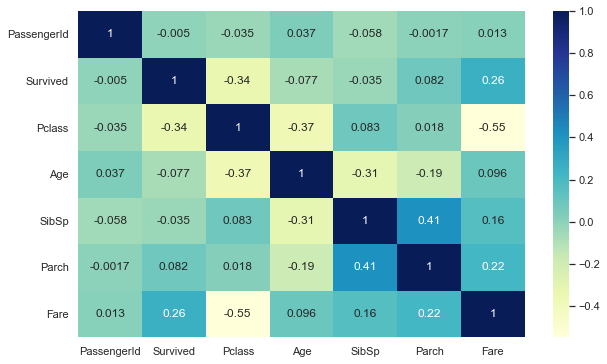

In [28]:
# Correlation
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

Text(0.5, 1.0, '1-Pclass')

Text(0.5, 1.0, '2-Pclass')

Text(0.5, 1.0, '3-Pclass')

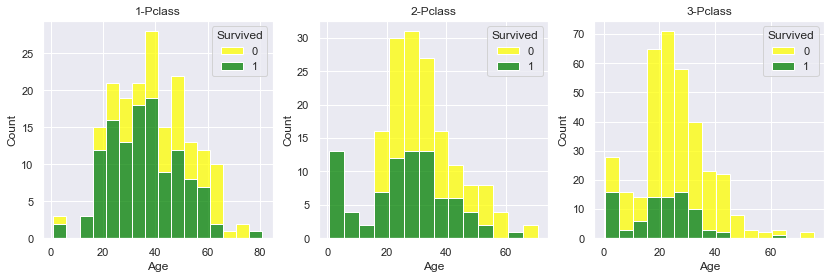

In [29]:
# Pclass - Age - Survived
# 3 plots
plot, ax = plt.subplots(1, 3, figsize = (14, 4))

# class 1
sns.histplot(data = train_data.loc[train_data['Pclass']==1], x = 'Age'
             , hue = 'Survived', binwidth = 5, ax = ax[0], palette = sns.color_palette(['yellow', 'green'])
             , multiple = 'stack').set_title('1-Pclass')

# class 2
sns.histplot(data = train_data.loc[train_data['Pclass']==2], x = 'Age'
             , hue = 'Survived', binwidth = 5, ax = ax[1], palette = sns.color_palette(['yellow', 'green'])
             , multiple = 'stack').set_title('2-Pclass')

# class 3
sns.histplot(data = train_data.loc[train_data['Pclass']==3], x = 'Age'
             , hue = 'Survived', binwidth = 5, ax = ax[2], palette = sns.color_palette(['yellow', 'green'])
             , multiple = 'stack').set_title('3-Pclass')

plt.show()

Text(0.5, 1.0, 'Males')

Text(0.5, 1.0, 'Females')

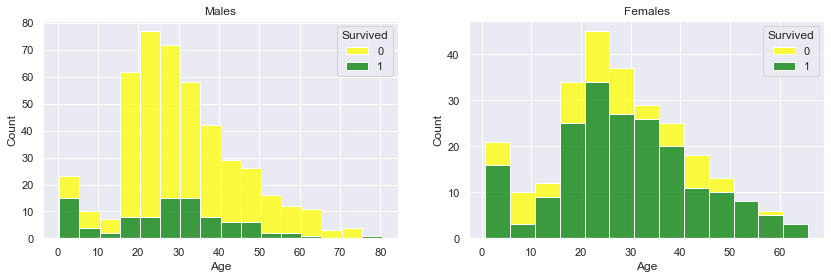

In [30]:
# Sex - Age - Survived
# 2 plots
plot, ax = plt.subplots(1, 2, figsize = (14, 4))

# Males
sns.histplot(data = train_data.loc[train_data['Sex']== 'male'], x = 'Age'
             , hue = 'Survived', binwidth = 5, ax = ax[0], palette = sns.color_palette(['yellow', 'green'])
             , multiple = 'stack').set_title('Males')

# Females
sns.histplot(data = train_data.loc[train_data['Sex']== 'female'], x = 'Age'
             , hue = 'Survived', binwidth = 5, ax = ax[1], palette = sns.color_palette(['yellow', 'green'])
             , multiple = 'stack').set_title('Females')

# Females most likely to survived

## Processing Data

### Remove unuseful data : PassengerId, Ticket, Cabin

In [31]:
train_data.drop(columns = ['PassengerId'], inplace = True)
for dataset in combine:
    dataset.drop(columns = ["Ticket" , "Cabin"] , inplace = True)

In [32]:
train_data.info()
for dataset in combine:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null

### Converting Categorical Features to Numerical and Filling Missed Values

#### Embarked

In [33]:
train_data.Embarked.fillna(train_data.Embarked.dropna().max(), inplace=True)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

#### Sex

In [34]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)    

#### Age

In [35]:
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

#### Fare

In [36]:
test_data.Fare.fillna(test_data.Fare.dropna().median() , inplace= True)

In [37]:
train_data.isnull().sum()
test_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Creating Bands

#### Age Band

In [38]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [39]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset["Age"] <=32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset["Age"] <=48), 'Age'] = 2    
    dataset.loc[(dataset['Age'] > 48) & (dataset["Age"] <=64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']
    
train_data.head()

33     66
54     65
96     71
116    70
280    65
456    65
493    71
630    80
672    70
745    70
851    74
Name: Age, dtype: int64

81    67
96    76
Name: Age, dtype: int64

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,0,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,1,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,0,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,0,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,0,"(32.0, 48.0]"


In [40]:
train_data.drop(['AgeBand'], axis = 1, inplace = True)

#### Fare Band

In [41]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [42]:
for dataset in combine:
    dataset.loc[dataset["Fare"] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2    
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3 
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data.drop(['FareBand'], axis=1 , inplace = True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,1
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3,0
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1,0


### Data Engineering

#### Family Size

In [43]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data.drop(['Parch', 'SibSp'], axis = 1, inplace = True)
test_data.drop(['Parch', 'SibSp'], axis = 1, inplace = True)

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [44]:
# new feature for family size
for dataset in combine:
    dataset['Single'] = dataset['FamilySize'].map(lambda s:1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s:1 if s == 2 else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s:1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s:1 if s >= 5 else 0)

train_data.drop(columns= ['FamilySize'], inplace = True)
test_data.drop(columns= ['FamilySize'], inplace = True)

#### Name Title

In [45]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
    
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [46]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col'
                                                 , 'Don', 'Dr', 'Major', 'Rev', 'Sir'
                                                 , 'Jonkheer', 'dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')    
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [47]:
title_mapping = {'Mr':1, 'Miss':2, "Mrs":3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [48]:
train_data.drop(['Name'], axis = 1, inplace = True)
test_data.drop(['Name'], axis = 1, inplace = True)

In [49]:
train_data.head()
test_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Single,SmallF,MedF,LargeF,Title
0,0,3,0,1,0,0,0,1,0,0,1
1,1,1,1,2,3,1,0,1,0,0,3
2,1,3,1,1,1,0,1,0,0,0,2
3,1,1,1,2,3,0,0,1,0,0,3
4,0,3,0,2,1,0,1,0,0,0,1


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Single,SmallF,MedF,LargeF,Title
0,892,3,0,2,0,2,1,0,0,0,1.0
1,893,3,1,2,0,0,0,1,0,0,3.0
2,894,2,0,3,1,2,1,0,0,0,1.0
3,895,3,0,1,1,0,1,0,0,0,1.0
4,896,3,1,1,1,0,0,0,1,0,3.0


### Modeling

In [50]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [51]:
Y_train = train_data["Survived"]
X_train = train_data.drop(labels = ['Survived'], axis = 1)
Test = test_data.drop(labels=['PassengerId'], axis = 1)
Y_train.shape
X_train.shape
Test.shape

(891,)

(891, 10)

(418, 10)

In [52]:
# Cross validate model with Kfold startified cross val
kfold = StratifiedKFold(n_splits = 10)

Text(0.5, 0, 'Mean Accuracy')

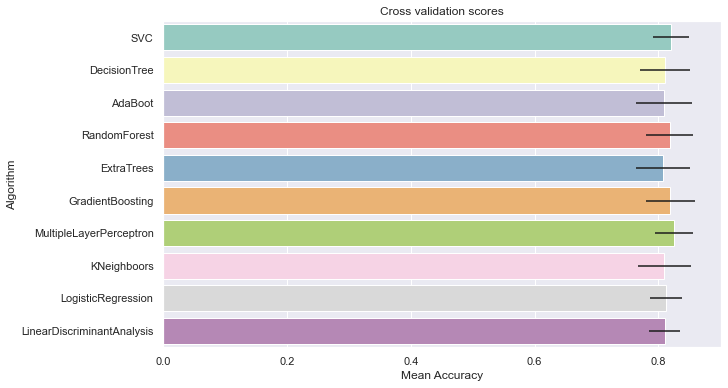

In [53]:
# Modeling step Test differents algorithms
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state, learning_rate = 0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring= 'accuracy', cv = kfold, n_jobs=4))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({'CrossValMeans': cv_means, 'CrossValerrors': cv_std, "Algorithm":['SVC', 'DecisionTree', 'AdaBoot'
                                                                                         , 'RandomForest', 'ExtraTrees'
                                                                                         , 'GradientBoosting', 'MultipleLayerPerceptron'
                                                                                         , 'KNeighboors', 'LogisticRegression','LinearDiscriminantAnalysis']})
g = sns.barplot('CrossValMeans', 'Algorithm', data = cv_res, palette='Set3', orient='h', **{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

In [54]:
# Meta modeling
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {'base_estimator__criterion': ['gini', 'entropy']
                  , 'base_estimator__splitter': ['best', 'random']
                  , 'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,2]
                  , 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}

gsadaDTC = GridSearchCV(adaDTC, param_grid=ada_param_grid, cv=kfold, scoring='accuracy'
                        , n_jobs=4, verbose=1)

gsadaDTC.fit(X_train, Y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=7),
             n_jobs=4,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                           1.5],
                         'n_estimators': [1, 2]},
             scoring='accuracy', verbose=1)

0.8137453183520599

In [55]:
# ExtraTrees
ExtC = ExtraTreesClassifier()

# Search grid for optimal parameters
ex_param_grid = {'max_depth': [None]
                 , 'max_features':[1, 3, 10]
                 , 'min_samples_split': [2, 3, 10]
                 , 'min_samples_leaf':[1, 3, 10]
                 , 'bootstrap':[False]
                 , 'n_estimators':[100, 300]
                 , 'criterion':['gini']}

gsExtC = GridSearchCV(ExtC, param_grid = ex_param_grid, cv = kfold
                      , scoring='accuracy', n_jobs=4, verbose=1)

gsExtC.fit(X_train, Y_train)

ExtC_best = gsExtC.best_estimator_

# Best Score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

0.8283270911360798

In [56]:
# RFC Parameters tunning
RFC = RandomForestClassifier()

# Search grid for optimal parameters
rf_param_grid = {'max_depth': [None]
                 , 'max_features':[1, 3, 10]
                 , 'min_samples_split': [2, 3, 10]
                 , 'min_samples_leaf':[1, 3, 10]
                 , 'bootstrap':[False]
                 , 'n_estimators':[100, 300]
                 , 'criterion':['gini']}

gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv = kfold
                      , scoring='accuracy', n_jobs=4, verbose=1)

gsRFC.fit(X_train, Y_train)

RFC_best = gsRFC.best_estimator_

# Best Score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

0.83167290886392

In [57]:
# Gradient boosting tunning
GBC = RandomForestClassifier()

# Search grid for optimal parameters
gb_param_grid = {'max_depth': [None]
                 , 'max_features':[1, 3, 10]
                 , 'min_samples_split': [2, 3, 10]
                 , 'min_samples_leaf':[1, 3, 10]
                 , 'bootstrap':[False]
                 , 'n_estimators':[100, 300]
                 , 'criterion':['gini']}

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv = kfold
                      , scoring='accuracy', n_jobs=4, verbose=1)

gsGBC.fit(X_train, Y_train)

GBC_best = gsGBC.best_estimator_

# Best Score
gsGBC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

0.8316853932584269

In [58]:
# SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf']
                  , 'gamma': [0.001, 0.01, 0.1, 1]
                  , 'C': [1, 10, 50, 100, 200, 300, 1000]}

gsSVMC = GridSearchCV(SVMC, param_grid=svc_param_grid, cv = kfold
                      , scoring='accuracy', n_jobs=4, verbose=1)

gsSVMC.fit(X_train, Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best Score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(probability=True), n_jobs=4,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

0.8338951310861423

In [59]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None
                        , n_job = -1, train_sizes = np.linspace(.1, 1.0, 5)):
    # Gengerate a simple plot of the test and training learning curve
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training example')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator
                                                            , X, y, cv=cv, n_jobs=n_job, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std
                     , train_scores_mean + train_scores_std, alpha = 0.1
                     , color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std
                     , test_scores_mean + test_scores_std, alpha = 0.1
                     , color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r'
             , label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'r'
             , label = 'Cross-validation score')
    
    plt.legend(loc = 'best')
    return plt

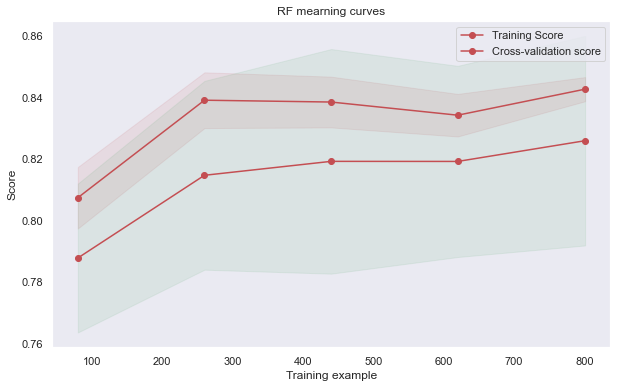

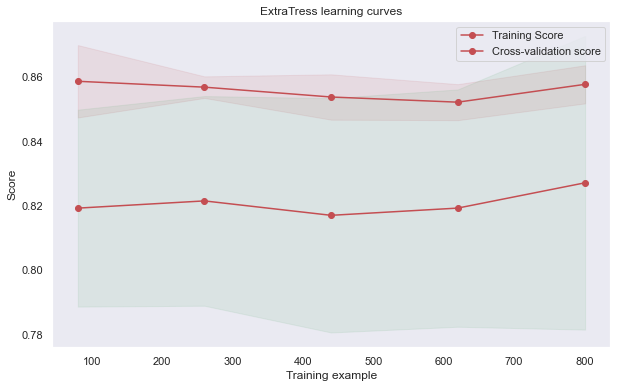

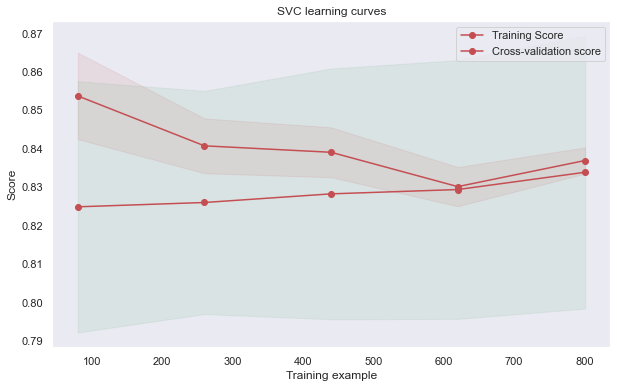

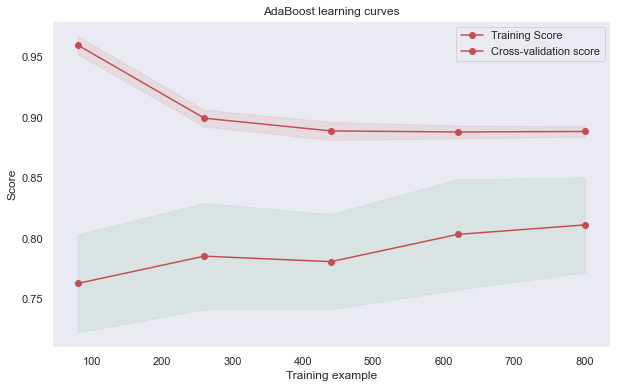

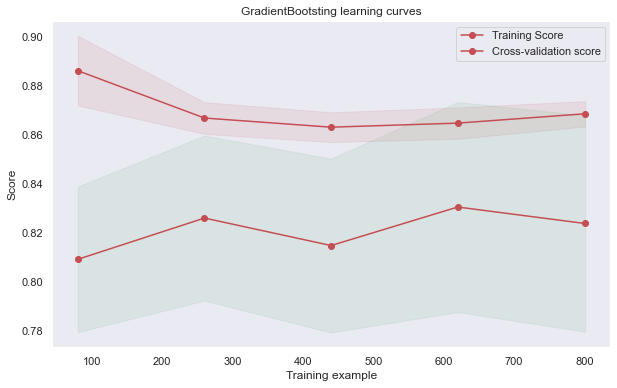

In [60]:
g = plot_learning_curve(gsRFC.best_estimator_, 'RF mearning curves', X_train
                        , Y_train, cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_, 'ExtraTress learning curves', X_train
                        , Y_train, cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_, 'SVC learning curves', X_train
                        , Y_train, cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_, 'AdaBoost learning curves', X_train
                        , Y_train, cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_, 'GradientBootsting learning curves', X_train
                        , Y_train, cv=kfold)

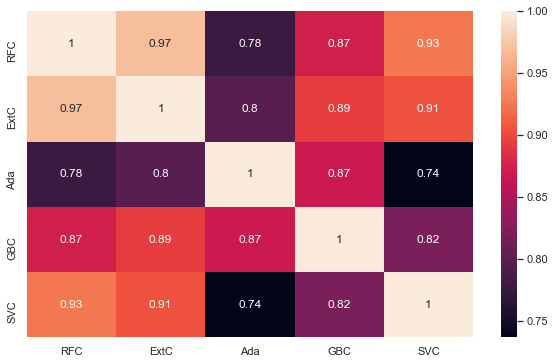

In [61]:
test_Survived_RFC = pd.Series(RFC_best.predict(Test), name = 'RFC')
test_Survived_ExtC = pd.Series(ExtC_best.predict(Test), name = 'ExtC')
test_Survived_SVMC = pd.Series(SVMC_best.predict(Test), name = 'SVC')
test_Survived_AdaC = pd.Series(ada_best.predict(Test), name = 'Ada')
test_Survived_GBC = pd.Series(GBC_best.predict(Test), name = 'GBC')

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC, test_Survived_ExtC
                              , test_Survived_AdaC, test_Survived_GBC
                              , test_Survived_SVMC], axis = 1)

g = sns.heatmap(ensemble_results.corr(), annot = True)

In [63]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best)
                                       , ('svc', SVMC_best), ('adac', ada_best)]
                           , voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [64]:
test_Survived = pd.Series(votingC.predict(Test), name='Survived')
result = pd.concat([test_data.PassengerId, test_Survived], axis = 1)

In [65]:
# 0 = died; 1 = survived
result.sample(20)

,PassengerId,Survived
11,903,0
149,1041,0
150,1042,1
33,925,1
314,1206,1
60,952,0
168,1060,1
100,992,1
243,1135,0
215,1107,0


In [66]:
# results.to_csv("Titanic_ensemble_modeling_predict.csv",index=False)